# Data Import and Preparation

Import pandas and setup options

In [16]:
# Unit 2 Section 4 assessment
# How to read csv file
# import the pandas library as pd for short hand
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib
from tabulate import tabulate
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#expanding the columns in frame to show data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('mode.use_inf_as_na', True)

from IPython.core.display import display, HTML

def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))


Import data for April 2020 and April 2021 for analysis

In [17]:
# read the CSV file
epd_20 = pd.read_csv(r'C:\Users\PBarr\Documents\git\string\data\EPD_202004.csv')
epd_21 = pd.read_csv(r'C:\Users\PBarr\Documents\git\string\data\EPD_202104.csv')
# displaying the contents of the CSV file - this will take a few seconds.
#print(epd_20)
#print(epd_21)
# check that a data frame has been created for each epd dataset
type(epd_20)
type(epd_21)

pandas.core.frame.DataFrame

# Initial Exploration

Explore summary chapter data for April 20 and April 21

In [18]:
# summarise the BNF Chapter column for April 2020 
print('Summarise April 2020 Data:')
descrip_BNF_CHAPTER20 = epd_20.BNF_CHAPTER_PLUS_CODE.describe()

print()
print(descrip_BNF_CHAPTER20)

Summarise April 2020 Data:

count                         216319
unique                            20
top       04: Central Nervous System
freq                           54743
Name: BNF_CHAPTER_PLUS_CODE, dtype: object


In [19]:
sum = epd_20.ACTUAL_COST.sum()
print ("Total Value of Pharm Products April 2020: £{:0,.2f}".format( sum) )

Total Value of Pharm Products April 2020: £7,849,553.17


In [20]:
# summarise the BNF Chapter column for April 2021
print('Summarise April 2021 Data')
descrip_BNF_CHAPTER21 = epd_21.BNF_CHAPTER_PLUS_CODE.describe()
print()
print(descrip_BNF_CHAPTER21)

Summarise April 2021 Data

count                         221428
unique                            21
top       04: Central Nervous System
freq                           56409
Name: BNF_CHAPTER_PLUS_CODE, dtype: object


In [21]:
#calculate the total cost of pharmaceutical products in April 2021
sum = epd_21.ACTUAL_COST.sum()
print("Total Value of Pharm Products April 2021: £{:0,.2f}".format( sum))

Total Value of Pharm Products April 2021: £8,129,384.50


In [22]:
# Difference in actual cost from April 20
diff = epd_21.ACTUAL_COST.sum() - epd_20.ACTUAL_COST.sum()
print(diff)

279831.3305400014


There was a increase in cost for the pharmaceuticals ordered in April 21 compared with April 20 of £279,831.  The counts reveal that there was an increase in the number items prescribed. There were 5,109 more items prescibed in April 21 compared with April 20.  There was also an additional British National Formulatory (BNF) chapter in April 2021. 

# Data Prepartion to Compare Quanity and Costs by BNF Chapter

Create new sub-dataframe for April 20 showing the BHF Chapter Categories, Total_Quantity and Actual_Cost columns

In [23]:
epdq_20 = epd_20[['BNF_CHAPTER_PLUS_CODE','TOTAL_QUANTITY','ACTUAL_COST']].copy()
#print(epdq_20)

##group by BNF_CHAPTER_PLUS_CODE
epdq_20 = epdq_20.groupby(['BNF_CHAPTER_PLUS_CODE']).sum()

epdq_20.rename(columns={'TOTAL_QUANTITY':'QUANTITY_APRIL20'}, inplace=True) 
epdq_20.rename(columns={'ACTUAL_COST':'COST_APRIL20'}, inplace=True)

Note in the above we have grouped the data by the chapter category and summed the Total_Quanitity and Actual_Cost.  We have also renamed the columns QUANTITY_APRIL20 and COST_APRIL20

Create new sub-dataframe for April 21 showing the BHF Chapter Categories, Total_Quantity and Actual_Cost columns

In [24]:
epdq_21 = epd_21[['BNF_CHAPTER_PLUS_CODE','TOTAL_QUANTITY','ACTUAL_COST']].copy()
#print(epdq_21)

##group by BNF_CHAPTER_PLUS_CODE
epdq_21 = epdq_21.groupby(['BNF_CHAPTER_PLUS_CODE']).sum()
epdq_21.rename(columns={'TOTAL_QUANTITY':'QUANTITY_APRIL21'}, inplace=True)
epdq_21.rename(columns={'ACTUAL_COST':'COST_APRIL21'}, inplace=True)

Note in the above we have grouped the data by the chapter category and summed the Total_Quantity and Actual_Cost.  We have also renamed the columns QUANTITY_APRIL21 and COST_APRIL21

merge the the sub-frames togther to show April 20 and April 21 grouped data in one dataframe.  Add a total row summing the quantity and cost columns for April 20 and April 21

In [25]:
# now merge frames together using merge function
result = pd.merge(epdq_20, epdq_21, how = "outer", on="BNF_CHAPTER_PLUS_CODE")
# change null value to 0
result = result.fillna(0)
# add total line
result.loc['Total']= result.sum(numeric_only=True, axis=0)

Add columns to compare the difference in quantity and cost for each category.  Also add calculations for percentage change

In [26]:
#add columns comparing quanity and cost
result["DiffFrom2020_Quan"] = (result["QUANTITY_APRIL21"] - result["QUANTITY_APRIL20"])
result["Percentage_Change_Quan"] = ((result["DiffFrom2020_Quan"] / result["QUANTITY_APRIL20"])*100)

result["DiffFrom2020_Cost"] = (result["COST_APRIL21"] -  result["COST_APRIL20"])
result["Percentage_Change_Cost"] = ((result["DiffFrom2020_Cost"] / result["COST_APRIL20"])*100)

# Presentation of Results

Create new sub-frame to visualise percentage changes for both quantity and cost

In [27]:
# plot quantity and cost differences (Percentage Change)
percent_change = result[['Percentage_Change_Quan', 'Percentage_Change_Cost']].copy()

In [28]:
force_show_all (percent_change) # check output

,Percentage_Change_Quan,Percentage_Change_Cost
BNF_CHAPTER_PLUS_CODE,,
01: Gastro-Intestinal System,4.339294,16.172996
02: Cardiovascular System,0.198450,11.074442
03: Respiratory System,-1.375782,-3.482116
04: Central Nervous System,-1.452625,-3.680279
05: Infections,-8.134271,-4.383303
06: Endocrine System,3.174590,5.540502
"07: Obstetrics, Gynaecology and Urinary-Tract Disorders",-0.805841,2.645310
08: Malignant Disease and Immunosuppression,-10.685144,6.054550
09: Nutrition and Blood,1.703710,2.194683


The largest change was in "14: Immunological Products and Vaccines", which jumped by over 400% in the quantity prescibed.  This resulted in a 375% increase in actual cost.  

The category "18: Preparationused in Diagnosis", the percentage change cannot be represented as this category was not evident in the data for April 20.  Showing a completely new BNF Chapter of pharmaceutical products was required in April 21. 

Text(0, 0.5, 'BNF Chapter')

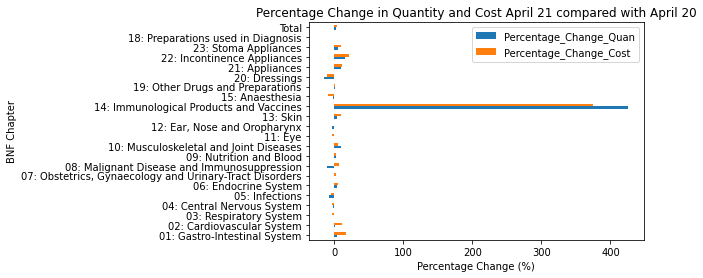

In [29]:
plot1 = percent_change.plot(kind = 'barh', title='Percentage Change in Quantity and Cost April 21 compared with April 20')
plot1.xlabel = "Percentage Change (%)"
plot1.set_xlabel("Percentage Change (%)")
plot1.set_ylabel("BNF Chapter")

The chart shows a 400% increase in the puchase of "14: Immunological Products and Vaccines".  What is not shown in this chart however is the emergence of purchases agaisnt "Preparations used in Diagnosis" (the % change cannot be calculated as there was no activity in April 20).

Text(0, 0.5, 'BNF Chapter')

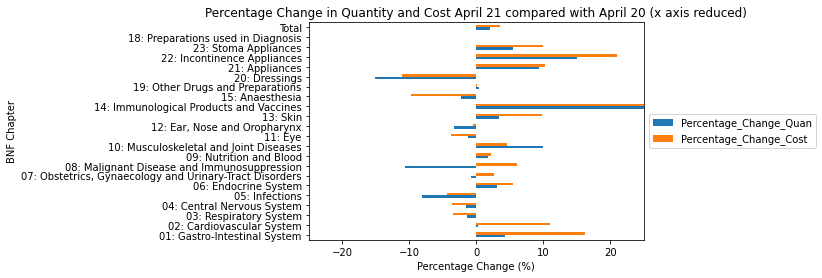

In [30]:
plot2 = percent_change.plot(kind = 'barh', title='Percentage Change in Quantity and Cost April 21 compared with April 20 (x axis reduced)')
plot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot2.set_xlim(-25, 25)
plot2.set_xlabel("Percentage Change (%)")
plot2.set_ylabel("BNF Chapter")

The scale on the x-axis is reduced to only show the percetage changes from -25% to +25%. Differences in percentage changes in quantity and cost for each chapter can be identified.

The blue bars show increases in quantity purchased. Nine categories have increased in quantity prescribed and seven have decreased in quanitity prescribed.

The orange bars show increases and descreases in the actual cost of the items purchased within the chapters.  Most of the orange bars follow the same direction as the blue, which indicates as the quantity of purchases have increased so too has the cost, likewise for categories that are purchased less the cost has also reduced.

There are two exceptions:
For "08: Mailignant Disease and Immossuppression", this has seen a 10% reduction in purchases made but the cost of these products has increased by 6%.
For "07: Obstetrics, Gynaecology and Urinary Tract Disorders", this has seen a 0.8% reduction in purchases but the actual cost has increased by 2.6%.

The Total line shows that overall quanity purchased has increased by 2% and this has increased overall actual cost by 3.5%.  There are more orange bars with a positive change in cost than negative, showing in general costs have increased.

The next plots show actual cost differences

In [31]:
#create new dataframe to capture data on actual cost changes
cost_diff = result[['DiffFrom2020_Cost']].copy()
cost_diff2 = result[['COST_APRIL20','COST_APRIL21']].copy()

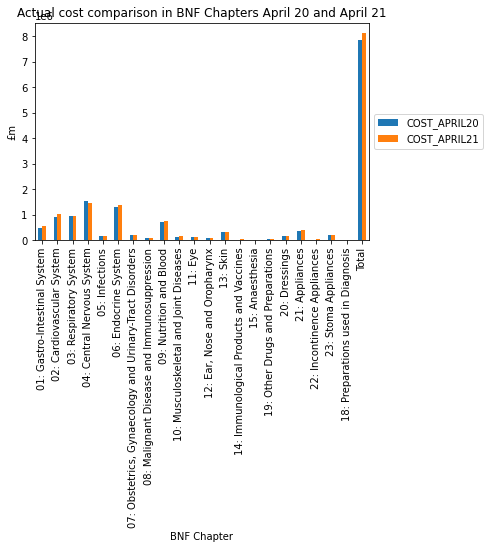

In [32]:
plot3 = cost_diff2.plot(kind = 'bar', title='Actual cost comparison in BNF Chapters April 20 and April 21')
plot3.set_xlabel("BNF Chapter")
plot3.set_ylabel("£m")
plot3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The plot is skewed by the Total line which is sum of cost of all categories.  We have already seen that the total cost increased by 3.5%, this is an increase from £7.85m to £8.13m (an increase of £279,831)

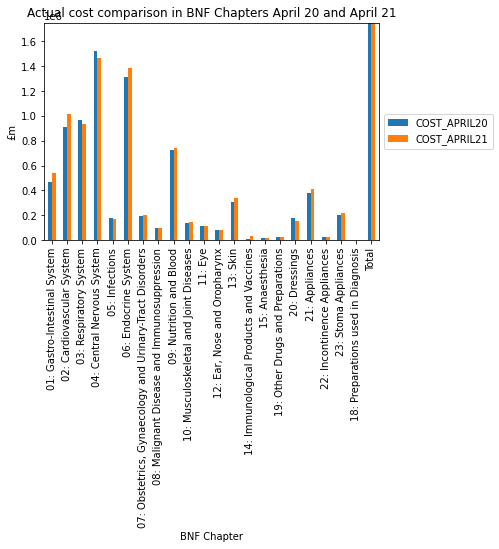

In [33]:
plot4 = cost_diff2.plot(kind = 'bar', title='Actual cost comparison in BNF Chapters April 20 and April 21')
plot4.set_xlabel("BNF Chapter")
plot4.set_ylabel("£m")
plot4.set_ylim(0,1750000)
plot4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Increases in the prescribing of the three most expensive chapters of product (01 Gastro (+ £75k), 02 Cardiovascular (+£100k) (03 Enocrine (+£72k) have influenced the overall cost the most. There was a reduction in prescriptions for 04: Central Nervous System (-£55k), 03: Respiratory System (-£33k) and 20: Dressing (-£20K).  The reduction in costs were not enough to counter the increased costs in other categroies.

The 400% increase in the purchase of "14: Immunological Products and Vaccines" had a negligible impact on the overall cost compared with the categories discussed above.  Cost of these products was £7k in April 2020 and £33k in April 2021 (a difference of £26k).

The emerging category in April 21 was "18. Preparations used in Diagnosis".  The cost in April 21 was a mere £163.  So although an emerging category is insignificant.

Text(0, 0.5, '£')

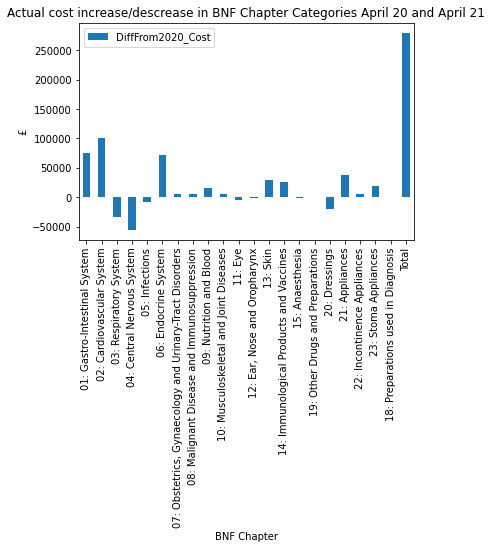

In [37]:
plot5 = cost_diff.plot(kind = 'bar', title='Actual cost increase/descrease in BNF Chapter Categories April 20 and April 21')
plot5.set_xlabel("BNF Chapter")
plot5.set_ylabel("£")

This plot shows the actual difference in cost.  This skewed by the total line which shows overall costs increased by £250k

(-70000.0, 110000.0)

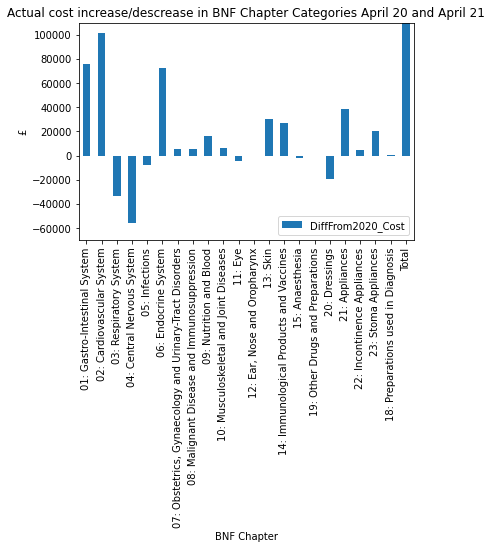

In [38]:
plot6 = cost_diff.plot(kind = 'bar', title='Actual cost increase/descrease in BNF Chapter Categories April 20 and April 21')
plot6.set_xlabel("BNF Chapter")
plot6.set_ylabel("£")
plot6.set_ylim(-70000,110000)

This final plot which has the y-axis limited to 110k, shows that the majority of product categories increased costs.  "02 Cardiovascular system" at £100k was responsible for 36% of the increased spend.  "01: Gastro-Intestinal System" at £75k was responsible for 27% and "06: Endocrine System" 25%. 

Format data to present in tabular

In [36]:
def format(x):
        return "£{:,.0f}".format(x)

result['COST_APRIL20'] = result['COST_APRIL20'].apply(format)
result['COST_APRIL21'] = result['COST_APRIL21'].apply(format)
result['DiffFrom2020_Cost'] = result['DiffFrom2020_Cost'].apply(format)

def format(x):
        return "{:,.0f}".format(x)
result['QUANTITY_APRIL20'] = result['QUANTITY_APRIL20'].apply(format)
result['QUANTITY_APRIL21'] = result['QUANTITY_APRIL21'].apply(format)
result['DiffFrom2020_Quan'] = result['DiffFrom2020_Quan'].apply(format)

def format(x):
    return "{:,.0f}".format(x)
    
    
result['Percentage_Change_Quan'] = result['Percentage_Change_Quan'].apply(format)
result['Percentage_Change_Cost'] = result['Percentage_Change_Cost'].apply(format)



In [8]:
force_show_all(result)

,QUANTITY_APRIL20,COST_APRIL20,QUANTITY_APRIL21,COST_APRIL21,DiffFrom2020_Quan,Percentage_Change_Quan,DiffFrom2020_Cost,Percentage_Change_Cost
BNF_CHAPTER_PLUS_CODE,,,,,,,,
01: Gastro-Intestinal System,"8,308,033","£468,508","8,668,543","£544,280","360,510",4,"£75,772",16
02: Cardiovascular System,"8,549,268","£914,785","8,566,234","£1,016,092","16,966",0,"£101,307",11
03: Respiratory System,"1,708,919","£968,189","1,685,408","£934,476","-23,511",-1,"£-33,713",-3
04: Central Nervous System,"13,853,165","£1,519,091","13,651,930","£1,463,184","-201,235",-1,"£-55,907",-4
05: Infections,"1,174,524","£181,082","1,078,986","£173,145","-95,539",-8,"£-7,937",-4
06: Endocrine System,"4,579,552","£1,313,136","4,724,934","£1,385,890","145,382",3,"£72,754",6
"07: Obstetrics, Gynaecology and Urinary-Tract Disorders","965,699","£194,625","957,917","£199,774","-7,782",-1,"£5,148",3
08: Malignant Disease and Immunosuppression,"113,728","£94,723","101,576","£100,458","-12,152",-11,"£5,735",6
09: Nutrition and Blood,"42,788,244","£724,795","43,517,231","£740,702","728,988",2,"£15,907",2


Data Presented above in table provides detail

Summary:  There was an overall increase of cost of 4% resulting from price increase and usage of the more expensive pharm products: Cardiovasucular, Gastro and Endocrine.  The resulting increase is £279,831.  

There was a 400% increase in the use of Immunological Products and Vaccines resulting in a cost of circa £25,000.  

There was a reduction in Central Nervous System products, Respiratory System and Dressings.  Had these been the same as April 20 levels the resulting increase would of been an additional £100k spend.  The reduction in these requires further investigation.